In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

sns.set()

### Read the data : 

In [2]:
data = pd.read_csv('nba_logreg.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 220.0+ KB


**Explications des  différents features:** 

- **GP :** Games Played. 
- **MIN :** Minutes Played. 
- **PTS :** Points Scored. 
- **FGM :** Field Goals Made. 
- **FGA :** Field Goals Attempted. 
- **FG% :** Successful Field Goals Percentage. 
- **3P Made :** 3 Points Made. 
- **3PA :** 3 Points Attempted. 
- **3P% :** Successful 3 Points Percentage. 
- **FTM :** Free Throws Made. 
- **FTA :** Free Throws Attempted. 
- **FT% :** Successful Free Throws Percentage. 
- **OREB :** Offensive Rebounds. 
- **DREB :** Defensive Rebounds. 
- **REB :** Rebounds. 
- **AST :** Assists. 
- **STL :** Steals. 
- **BLK :** Blocked shots. 
- **TOV :** Turnovers. 
- **TARGET_5Yrs :** Outcome : 1 if career length >= 5yrs, otherwise 0. 

## EDA : Exploratory data analysis : 

In [4]:
print("La description pour les variables numériques : ")
data.describe()

La description pour les variables numériques : 


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


### Matrice de corrélation :

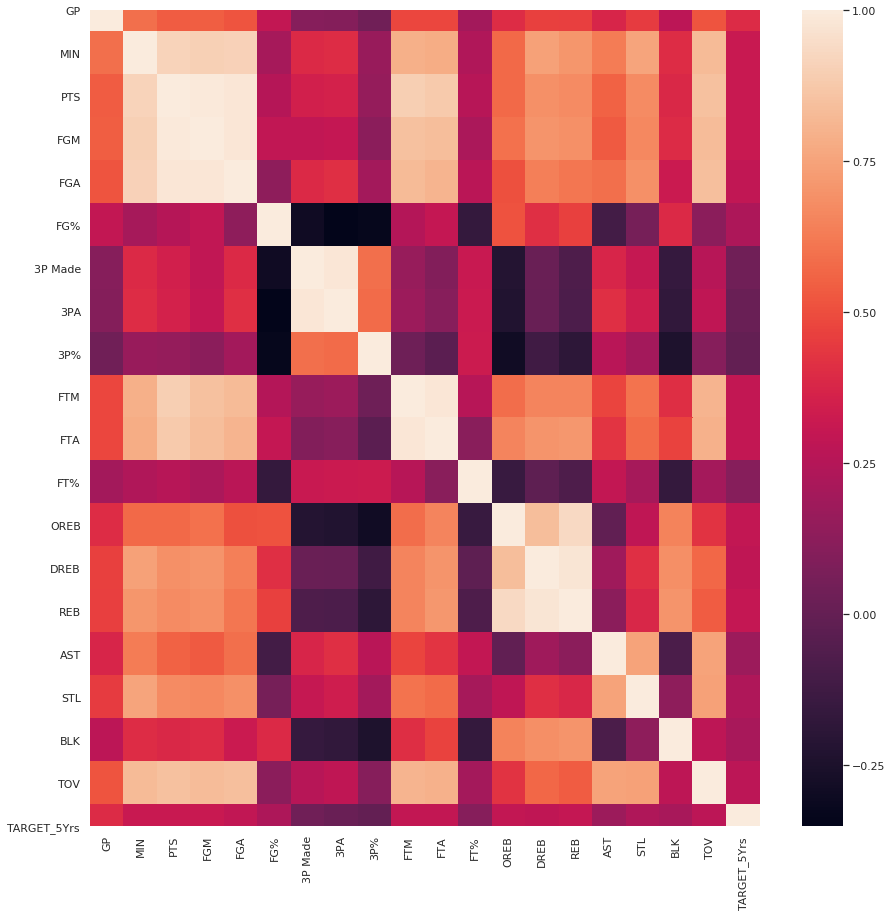

In [5]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [6]:
print('Le pourcentage des personnes sur lesquelles il ne faut pas misé est : {}%'.format(round(data['TARGET_5Yrs'].value_counts()[0]/data['TARGET_5Yrs'].shape[0]*100,2)))
print('Le pourcentage des personnes sur lesquelles il faut misé est : {}%'.format(round(data['TARGET_5Yrs'].value_counts()[1]/data['TARGET_5Yrs'].shape[0]*100,2)))

Le pourcentage des personnes sur lesquelles il ne faut pas misé est : 37.99%
Le pourcentage des personnes sur lesquelles il faut misé est : 62.01%


**Observations :**

- Nous pouvons voir ici que les variables explicatives présentes dans la data sont entièrement numériques.

- Nous observons aussi la présence de valeurs manquantes pour la variable *3P%*. une manière simple de remédier à ce problème serait de supprimer les lignes correspondantes aux valeurs manquantes, mais cela entraînera une perte de la donnée vu la taille du dataset. Il serait donc judicieux de remplir ces valeurs par une valeur bien choisi qu'on déterminera en observant mieux la donnée.

- La matrice de corrélation montre qu'il y a plusieurs variables corrélées. Cette corrélation peut détériorer la performance du modèle et il serait donc judicieux d'éliminer cette corrélation qui correspond en fait à une certaine redondance de l'information.

- Les variables qui sont corrélées sont : 
    - PTS, FGM et FGA
    - 3P Made et 3PA
    - FTM et FTA
    - OREB, DREB et REB

- Vu la répartition des données suivant le label TARGET_5Yrs nous pouvons dire que la donnée est répartie de manière équilibrée ( Balanced data ).


### Prétraitement sur les variables numériques :

In [7]:
def skewness_analysis(data,col_name, treshold_skewness =0.75):
    process = False
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(data.dropna()[col_name], ax=ax, label=col_name)
    print ("Etude de la colonne {} :\n".format(col_name))
    print("Le degré de la distorition de la variable (Skewness) : {}".format(round(data.dropna()[col_name].skew(),3)))
    print("Le coefficient d'étalement de la variable (Kurtosis) : {}\n".format(round(data.dropna()[col_name].kurt(),3)))
    if (np.abs(round(data.dropna()[col_name].skew(),3))>treshold_skewness):
        process = True
        print ("## Résultat aprés application du prétraitement : ## \n")
        print("Le degré de la distorition de la variable (Skewness) : {}".format(round(data.dropna()[col_name].apply(lambda x : np.log1p(x)).skew(),3)))
        print("Le coefficient d'étalement de la variable (Kurtosis) : {}".format(round(data.dropna()[col_name].apply(lambda x : np.log1p(x)).kurt(),3)))
        sns.distplot(np.log1p(data.dropna()[col_name]), ax=ax, label=col_name+" with log1P")
        
    else: print ("## Pas besoin de faire un traitement ##")
        
    plt.title('Distribution de la colonne '+col_name)
    plt.legend()
    plt.show()
    return process

In [8]:
def apply_sk_kurt_transform(data, treshold_skewness =0.75):
    columns_to_transform = []
    for col_name in data.columns:
        try : 
            if (np.abs(round(data.dropna()[col_name].skew(),3))>treshold_skewness):
                columns_to_transform.append(col_name)
        except:
            continue
    return columns_to_transform

**Paramètres à observer:**

- Le degré de la distorsion et le coefficient d'étalement renseignent sur la symétrie de la distribution et la répartition des valeurs. Le fait d'avoir un degré de distorsion et un facteur d'étalement élévés peut révéler la présence d'outliers qui peuvent affecter le résultat de la prédiction. Nous souhaitons avoir un degré de distorsion proche de 0 qui traduit une certaine symétrie de la courbe par rapport à la moyenne et une valeur du coefficient d'étalement inférieur à un seuil.Lorsqu'on observe une valeur élevée du degré de distorsion, il est possible d'appliquer la fonction logarithme qui permet de rendre la courbe plus symétrique (diminuer le degré de distorsion).

- Pour determiner la présence d'outlier, nous allons recourir à la fonction boxplot qui permet de voir la zone de répartition des valeurs.

----------------------
Etude de la colonne GP :

Le degré de la distorition de la variable (Skewness) : -0.476
Le coefficient d'étalement de la variable (Kurtosis) : -0.796

## Pas besoin de faire un traitement ##


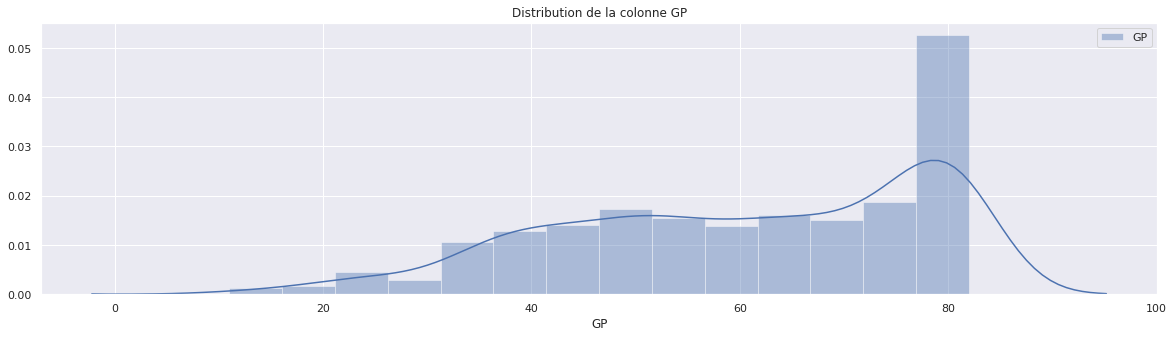

----------------------
Etude de la colonne MIN :

Le degré de la distorition de la variable (Skewness) : 0.627
Le coefficient d'étalement de la variable (Kurtosis) : -0.436

## Pas besoin de faire un traitement ##


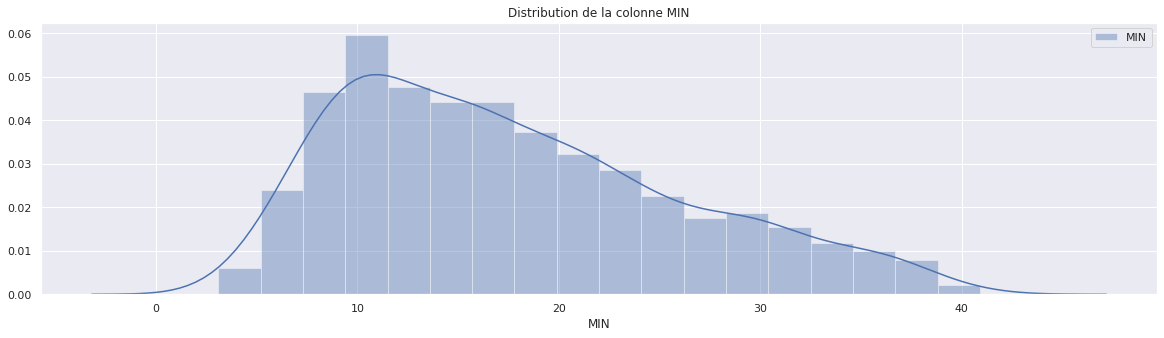

----------------------
Etude de la colonne PTS :

Le degré de la distorition de la variable (Skewness) : 1.382
Le coefficient d'étalement de la variable (Kurtosis) : 1.895

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.209
Le coefficient d'étalement de la variable (Kurtosis) : -0.474


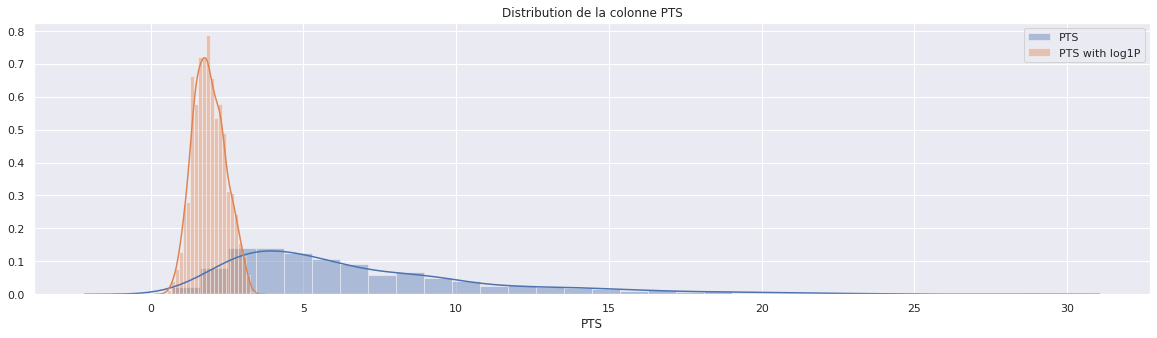

----------------------
Etude de la colonne FGM :

Le degré de la distorition de la variable (Skewness) : 1.338
Le coefficient d'étalement de la variable (Kurtosis) : 1.689

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.387
Le coefficient d'étalement de la variable (Kurtosis) : -0.435


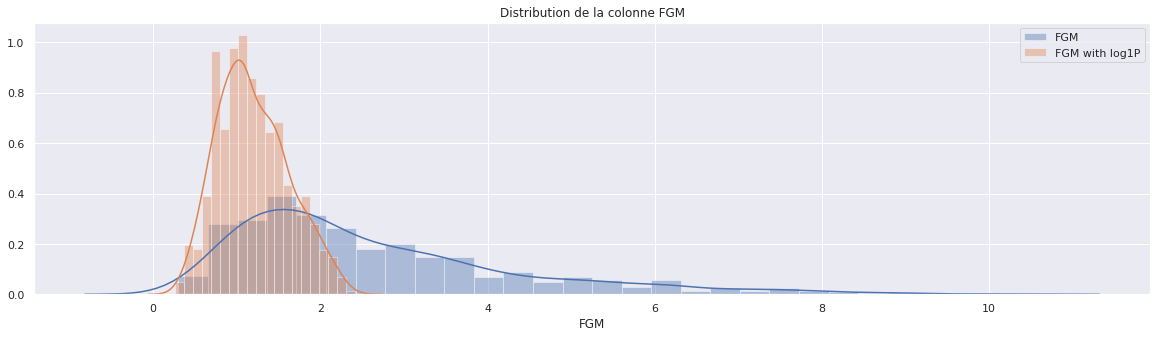

----------------------
Etude de la colonne FGA :

Le degré de la distorition de la variable (Skewness) : 1.291
Le coefficient d'étalement de la variable (Kurtosis) : 1.35

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.269
Le coefficient d'étalement de la variable (Kurtosis) : -0.498


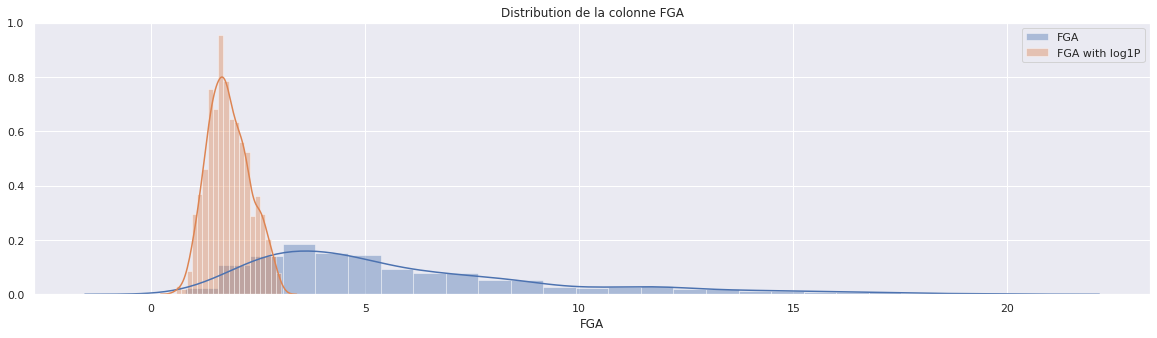

----------------------
Etude de la colonne FG% :

Le degré de la distorition de la variable (Skewness) : 0.211
Le coefficient d'étalement de la variable (Kurtosis) : 0.648

## Pas besoin de faire un traitement ##


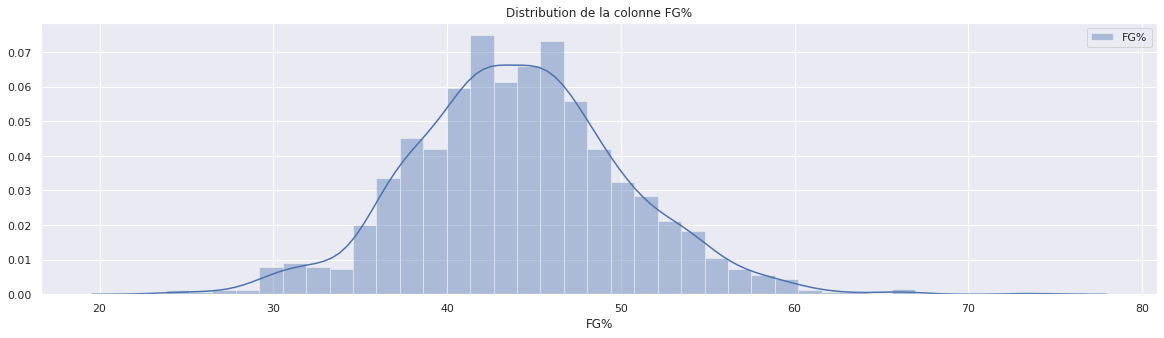

----------------------
Etude de la colonne 3P Made :

Le degré de la distorition de la variable (Skewness) : 2.021
Le coefficient d'étalement de la variable (Kurtosis) : 4.238

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 1.435
Le coefficient d'étalement de la variable (Kurtosis) : 1.299


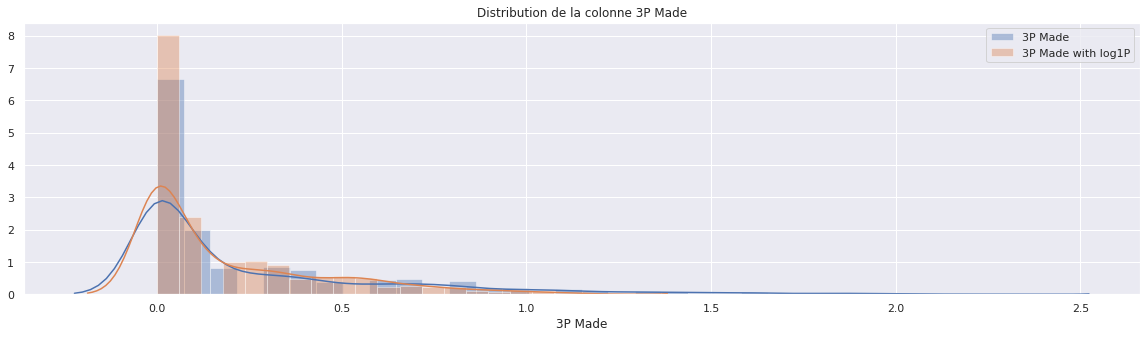

----------------------
Etude de la colonne 3PA :

Le degré de la distorition de la variable (Skewness) : 1.802
Le coefficient d'étalement de la variable (Kurtosis) : 3.25

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.951
Le coefficient d'étalement de la variable (Kurtosis) : -0.206


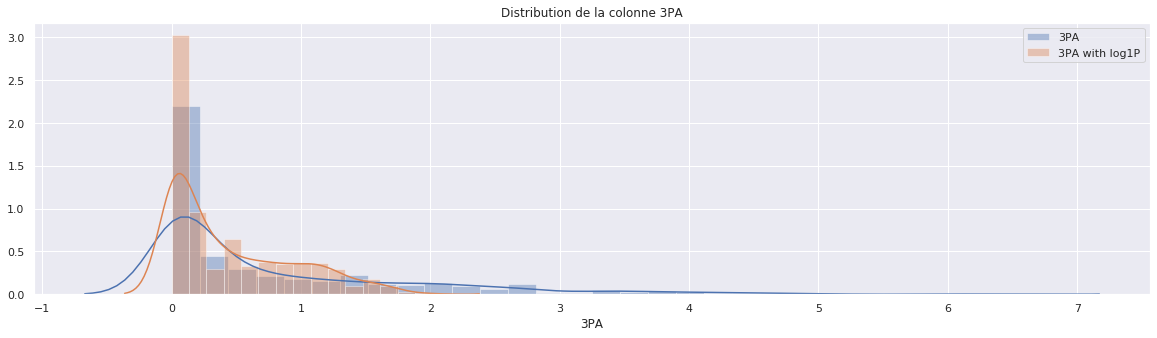

----------------------
Etude de la colonne 3P% :

Le degré de la distorition de la variable (Skewness) : 0.29
Le coefficient d'étalement de la variable (Kurtosis) : 0.322

## Pas besoin de faire un traitement ##


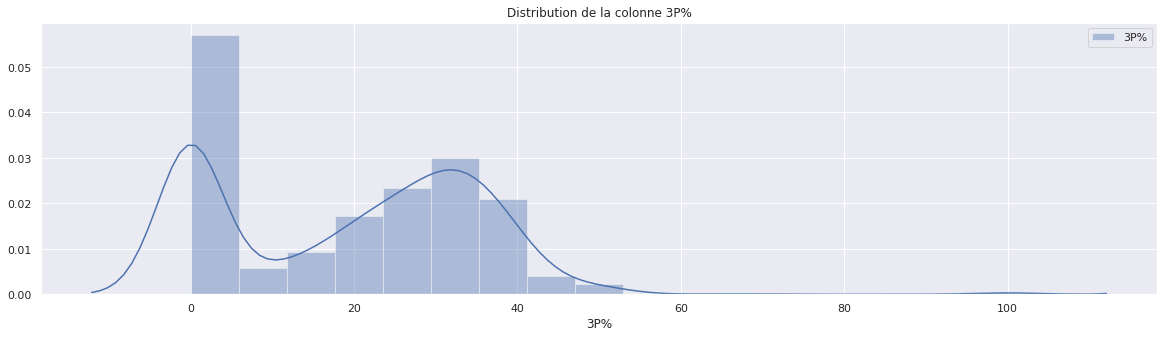

----------------------
Etude de la colonne FTM :

Le degré de la distorition de la variable (Skewness) : 1.933
Le coefficient d'étalement de la variable (Kurtosis) : 5.306

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.703
Le coefficient d'étalement de la variable (Kurtosis) : 0.32


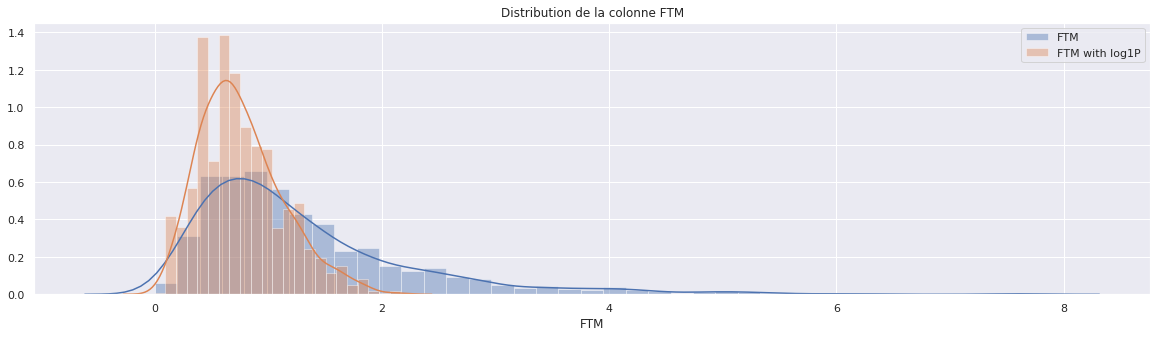

----------------------
Etude de la colonne FTA :

Le degré de la distorition de la variable (Skewness) : 1.834
Le coefficient d'étalement de la variable (Kurtosis) : 4.748

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.537
Le coefficient d'étalement de la variable (Kurtosis) : 0.053


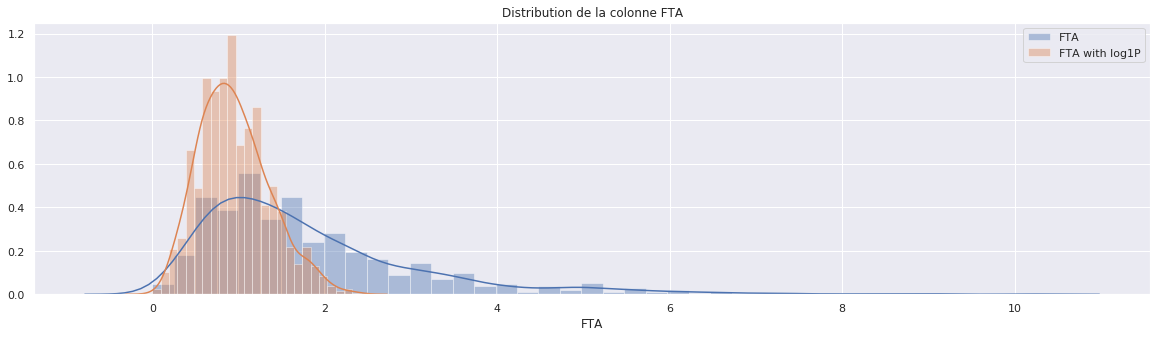

----------------------
Etude de la colonne OREB :

Le degré de la distorition de la variable (Skewness) : 1.445
Le coefficient d'étalement de la variable (Kurtosis) : 2.482

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.579
Le coefficient d'étalement de la variable (Kurtosis) : -0.266


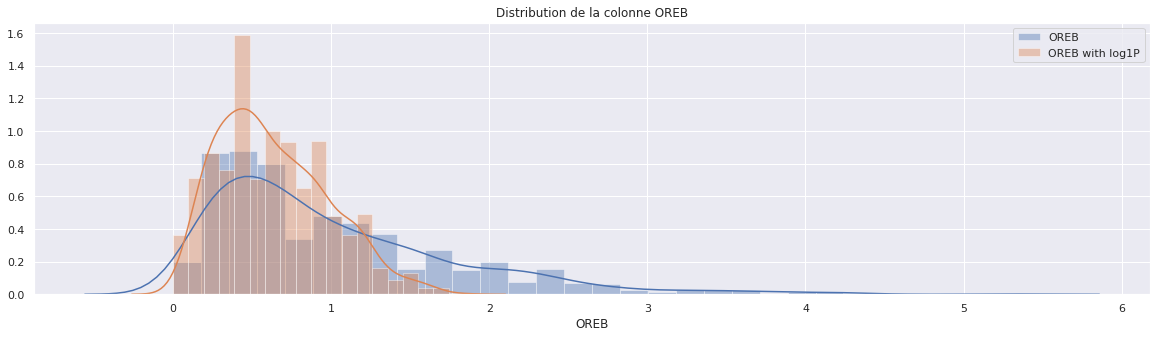

----------------------
Etude de la colonne DREB :

Le degré de la distorition de la variable (Skewness) : 1.497
Le coefficient d'étalement de la variable (Kurtosis) : 2.922

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.403
Le coefficient d'étalement de la variable (Kurtosis) : -0.329


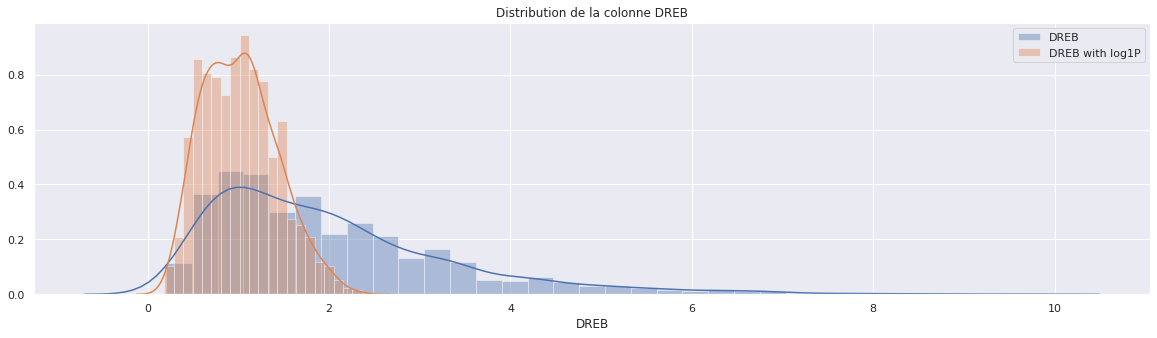

----------------------
Etude de la colonne REB :

Le degré de la distorition de la variable (Skewness) : 1.489
Le coefficient d'étalement de la variable (Kurtosis) : 2.711

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.329
Le coefficient d'étalement de la variable (Kurtosis) : -0.461


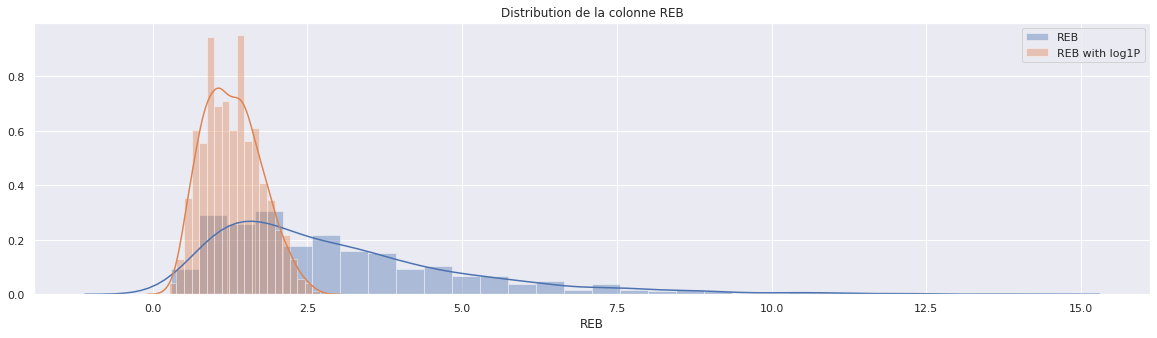

----------------------
Etude de la colonne AST :

Le degré de la distorition de la variable (Skewness) : 2.123
Le coefficient d'étalement de la variable (Kurtosis) : 5.699

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.753
Le coefficient d'étalement de la variable (Kurtosis) : 0.11


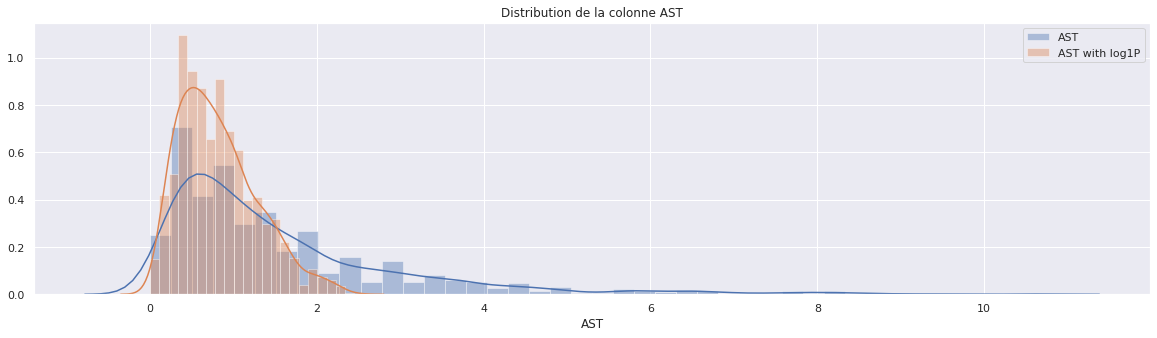

----------------------
Etude de la colonne STL :

Le degré de la distorition de la variable (Skewness) : 1.359
Le coefficient d'étalement de la variable (Kurtosis) : 2.221

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.694
Le coefficient d'étalement de la variable (Kurtosis) : 0.193


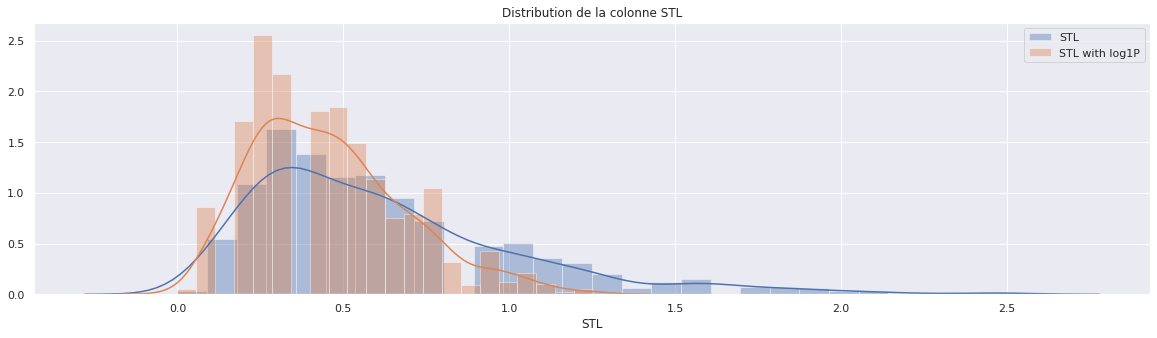

----------------------
Etude de la colonne BLK :

Le degré de la distorition de la variable (Skewness) : 2.834
Le coefficient d'étalement de la variable (Kurtosis) : 12.444

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 1.53
Le coefficient d'étalement de la variable (Kurtosis) : 2.745


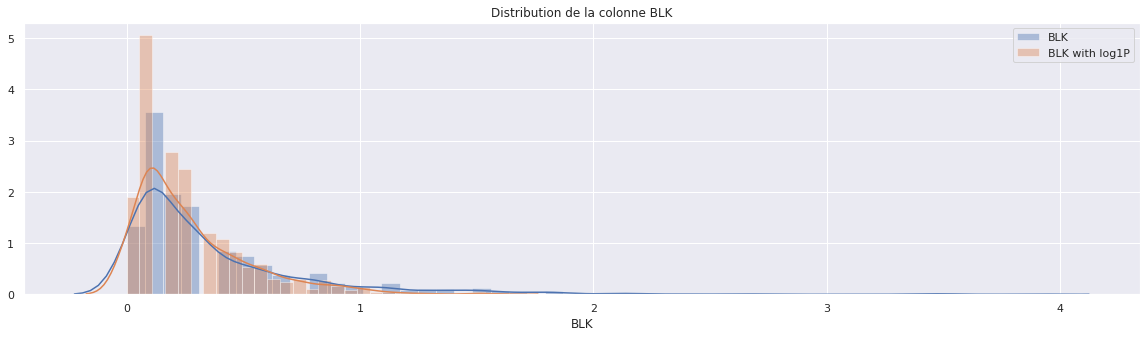

----------------------
Etude de la colonne TOV :

Le degré de la distorition de la variable (Skewness) : 1.333
Le coefficient d'étalement de la variable (Kurtosis) : 1.854

## Résultat aprés application du prétraitement : ## 

Le degré de la distorition de la variable (Skewness) : 0.557
Le coefficient d'étalement de la variable (Kurtosis) : -0.073


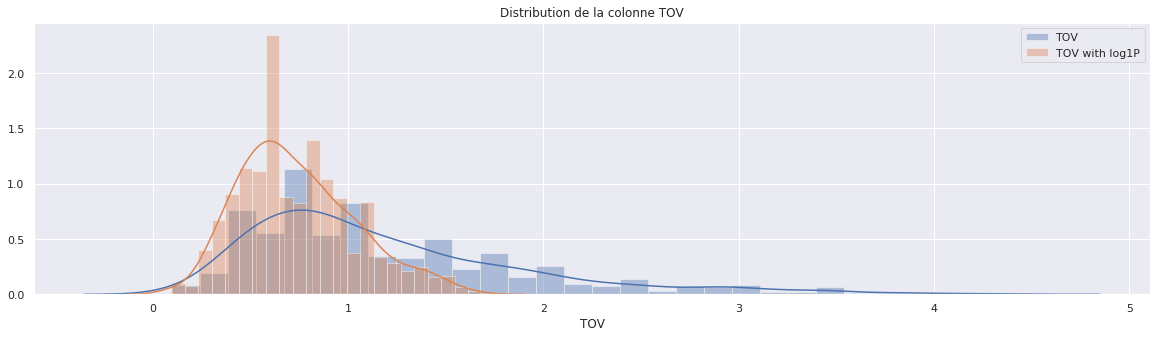

In [9]:
discard_columns= ["Name","FT%","TARGET_5Yrs"]
for col in data.columns:
    if col in discard_columns:
        continue
    print("----------------------")
    process = skewness_analysis(data, col)

In [10]:
columns_to_process = apply_sk_kurt_transform(data)
print("les colonnes sur lesquelles il faudrait appliquer des transformations sont :")
for col in columns_to_process:
    print(" - ",col)

les colonnes sur lesquelles il faudrait appliquer des transformations sont :
 -  PTS
 -  FGM
 -  FGA
 -  3P Made
 -  3PA
 -  FTM
 -  FTA
 -  FT%
 -  OREB
 -  DREB
 -  REB
 -  AST
 -  STL
 -  BLK
 -  TOV


### Ajout d'autres features qui pourrait être intéréssants :

Le nombre total de passes décisives, le nombre total de minutes jouées, etc. ne tiennent pas compte du nombre de matchs joués. En d'autres termes, il est possible qu'un joueur ait plus de minutes dans un jeu alors qu'il en a moins dans d'autres.

Donc, il est préférable d'avoir ces mesures par match (les minutes par match, les rebonds par match, les passes décisives par match, les interceptions par match)

Par contre il faudrait bien faire attention à supprimer les colonnes MIN, REB, AST, STL, BLK et TOV car cela entraine une augmentation de la variance et donc une détérioration de la performance du modèle.

### Résolution du problème de missing values :

En faisant une bonne observation sur la data, on peut constater que les valeurs manquantes dans la colonne 3P% correspondent aux moments où le joueur n'a pas tenté 3 points. Ces valeurs NaN peuvent donc être remplacées par 0.

### Appliquer le prétraitement : 

In [11]:
def preprocess(data):
    data["min_per_game"] = data["MIN"]/data["GP"]
    data["rebound_per_game"] = data["REB"]/data["GP"]
    data["assist_per_game"] = data["AST"]/data["GP"]
    data["steals_per_game"] = data["STL"]/data["GP"]
    data["blocks_per_game"] = data["BLK"]/data["GP"]
    data["turnovers_per_game"] = data["TOV"]/data["GP"]
    
    data.drop(columns = ["PTS", "OREB", "FTM"], inplace = True)
    
    data.fillna(0, inplace = True)

    columns_to_delete = ["Name","MIN","REB","AST","STL","BLK","TOV"]
    data.drop(columns = columns_to_delete, inplace = True)

    columns_to_process = apply_sk_kurt_transform(data)
    print(columns_to_process)
    for col in columns_to_process :
        data['log_'+col] = np.log1p(data[col])
    columns_to_delete = columns_to_process.copy()
    return data 

In [12]:
data = preprocess(data)

['FGM', 'FGA', '3P Made', '3PA', 'FTA', 'FT%', 'DREB', 'min_per_game', 'rebound_per_game', 'assist_per_game', 'steals_per_game', 'blocks_per_game', 'turnovers_per_game']


### Pour aller plus loin dans le prétraitement :

Une des méthodes à la quelle on peut penser est de tester l'importance des colonnes une à une, autrement dit de voir l'impact de son absence sur la performance de la prédiction de notre label. Dans le cas étudié ici, je prends la métrique f1_score pour juger de la performance du modèle puis qu'on est face à un problème de classification.

Dans la classe ci-dessous, j'ai mis en place les méthodes qui permettent de déterminer les features les plus importants. pour une meilleure robustesse, la determination des features se fait à l'aide d'un vote majoritaire des score calculer à partir d'un entrainement de trois modèles qui sont relativement rapides à entraîner.

La méthode suggérée nécessite un certain minimum de donnée pour avoir un résultat conclut et suppose que la donnée est répartie de manière homogène.



In [13]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier


class feature_selection:

    def __init__(self):
        self.columns = None
        self.columns_deleted = []

    def fit(self, X):
        def indic(x, y):
            if x < y:
                return 1
            return 0

        mat = X.copy().sample(frac=1).reset_index(drop=True)
        mat.dropna(inplace=True)
        columns = list(mat.columns)

        size = 1000  # min(mat.shape[0]//3,500)
        j = 0

        while (j < len(columns)-1 and len(columns) > 1):
            X_train, X_test = mat[columns].iloc[:size], mat[columns].iloc[size:size+100]
            y_train, y_test = X_train['TARGET_5Yrs'], X_test['TARGET_5Yrs']

            X_train.drop(columns=['TARGET_5Yrs'], inplace=True)
            X_test.drop(columns=['TARGET_5Yrs'], inplace=True)

            columns.remove('TARGET_5Yrs')

            stdscaler = StandardScaler()
            X_train_scaled = stdscaler.fit_transform(X_train)
            X_test_scaled = stdscaler.transform(X_test)

            score_11 = f1_score(y_test, LGBMClassifier().fit(
                X_train, y_train).predict(X_test))
            score_12 = f1_score(y_test, LogisticRegression().fit(
                X_train_scaled, y_train).predict(X_test_scaled))
            score_13 = f1_score(y_test, SVC().fit(
                X_train_scaled, y_train).predict(X_test_scaled))

            col = columns[j]
            columns.remove(col)

            X_train = X_train[columns]
            X_test = X_test[columns]

            stdscaler = StandardScaler()
            X_train_scaled = stdscaler.fit_transform(X_train)
            X_test_scaled = stdscaler.transform(X_test)

            score_21 = f1_score(y_test, LGBMClassifier().fit(
                X_train, y_train).predict(X_test))
            score_22 = f1_score(y_test, LogisticRegression().fit(
                X_train_scaled, y_train).predict(X_test_scaled))
            score_23 = f1_score(y_test, SVC().fit(
                X_train_scaled, y_train).predict(X_test_scaled))

            vote = indic(score_11, score_21) + indic(score_12,
                                                     score_22) + indic(score_13, score_23)
            if vote < 2:
                columns.insert(j, col)
            else:
                self.columns_deleted.append(col)
            j += 1
            columns.append('TARGET_5Yrs')

        self.columns = columns

    def transform(self, X):
        return X[self.columns]

In [14]:
cr_feature = feature_selection()
cr_feature.fit(data)

data = cr_feature.transform(data)

In [15]:
cr_feature.columns_deleted

['3P%']

## Détermination du meileur modèle :

Le problème qu'on est en train de traiter est un problème de classification. Ainsi les métriques qu'on devrait évaluer sont :
- Accuracy
- Precision 
- Recall
- F1- score


In [16]:
def score_classifier(dataset, classifier, labels):
    
    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    confusion_mat = np.zeros((2, 2))
    recall = 0
    precision = 0
    acc = 0
    f1Score = 0
    
    
    for training_ids, test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)
        
        confusion_mat += confusion_matrix(test_labels, predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        precision += precision_score(test_labels, predicted_labels)
        f1Score += f1_score(test_labels, predicted_labels)
        acc += accuracy_score(test_labels, predicted_labels)
    
    recall /= 3
    precision /= 3
    acc /= 3
    f1Score /= 3    
    
    print("Recall = ", recall)
    print("Precision = ", precision)
    print("Accuracy = ", acc)
    print("f1 score = {} \n".format(f1Score))
    print("confusion matrix : \n",confusion_mat)
#     plot_conf_matrix(confusion_mat)
    print("############################")
    return f1Score

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


dic = {'LogisticRegression': LogisticRegression, 
       'SVC': SVC, 
       'RandomForestClassifier': RandomForestClassifier, 
       'LGBMClassifier': LGBMClassifier,
       'XGBClassifier':XGBClassifier,
       'DecisionTreeClassifier':DecisionTreeClassifier
       }

models_with_scaling = [LogisticRegression, SVC]

X = data.drop(columns=['TARGET_5Yrs']).values
y = data.TARGET_5Yrs.values

best_m =''
best_sc = 0

for model in dic:
    if dic[model] in models_with_scaling:
        scaler = MinMaxScaler()
        X_scal = scaler.fit_transform(X)
        print("Model : {} \n".format(model))
        score = score_classifier(X_scal, dic[model](), y)
        if score > best_sc:
            best_sc = score
            best_m = model
    else:        
        print("Model : {} \n".format(model))
        score = score_classifier(X, dic[model](), y)
        if score > best_sc:
            best_sc = score
            best_m = model

Model : LogisticRegression 

Recall =  0.8375769739751906
Precision =  0.7316398968641508
Accuracy =  0.7082175473092498
f1 score = 0.7807144909564571 

confusion matrix : 
 [[253. 256.]
 [135. 696.]]
############################
Model : SVC 

Recall =  0.8725030837283066
Precision =  0.7188178558804221
Accuracy =  0.7089615874640102
f1 score = 0.7880523366994504 

confusion matrix : 
 [[225. 284.]
 [106. 725.]]
############################
Model : RandomForestClassifier 

Recall =  0.7389198203028555
Precision =  0.7415742260146593
Accuracy =  0.6783556210979692
f1 score = 0.7401870128919663 

confusion matrix : 
 [[295. 214.]
 [217. 614.]]
############################
Model : LGBMClassifier 

Recall =  0.7655756204983465
Precision =  0.7286395474431052
Accuracy =  0.6776115809432088
f1 score = 0.7464602464039293 

confusion matrix : 
 [[272. 237.]
 [195. 636.]]
############################
Model : XGBClassifier 

Recall =  0.8050560342425626
Precision =  0.7236516491042583
Accuracy =

In [18]:
print('le meilleur modèle suivant la métrique f1 score est le {} avec un score de {} %'.format(best_m,round(best_sc*100,2)))

le meilleur modèle suivant la métrique f1 score est le SVC avec un score de 78.81 %


## Normalisation de la donnée et entraînement du modèle: 

In [19]:
X = data.drop(columns=['TARGET_5Yrs']).values
y = data.TARGET_5Yrs.values

scaler = MinMaxScaler()
X_scal = scaler.fit_transform(X)

clf = SVC(probability=True)
clf.fit(X_scal,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Enregistrement du modèle ainsi que le scaling:

In [20]:
import pickle

from sklearn.externals import joblib

# save the classifier
with open('SVC.pkl', 'wb') as fid:
    pickle.dump(clf, fid)
    
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']